<a href="https://colab.research.google.com/github/NazilaNajmul/schulich_data_science/blob/main/Copy_of_Assignment_2_Nazila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#load all the csv files
customer= pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagements= pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv")
marketing= pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv")
transactions= pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv")

In [ ]:
#Heads of each dataset
print(customer.head())
print(engagements.head())
print(marketing.head())
print(transactions.head())

   customer_id   join_date last_purchase_date   age  gender           location
0            1  2023-11-20         2024-03-17  56.0  Female  North Shannonbury
1            2  2021-09-08         2023-10-25   NaN    Male          Hillville
2            3  2021-06-01         2022-11-27   NaN     NaN   North Latoyatown
3            4  2022-01-01         2022-09-01  29.0    Male          Grossstad
4            5  2022-01-24         2023-06-02   NaN    Male   East Matthewfort
   customer_id  number_of_site_visits  number_of_emails_opened  \
0            1                     10                       15   
1            2                    285                       49   
2            3                    192                       73   
3            4                    110                       30   
4            5                    161                        2   

   number_of_clicks  
0                 1  
1                51  
2                25  
3                17  
4                 7

In [ ]:
# Merge customer with engagement
merged_df = pd.merge(customer, engagements, on='customer_id', how='inner')

In [ ]:
print(merged_df.head())

   customer_id   join_date last_purchase_date   age  gender  \
0            1  2023-11-20         2024-03-17  56.0  Female   
1            2  2021-09-08         2023-10-25   NaN    Male   
2            3  2021-06-01         2022-11-27   NaN     NaN   
3            4  2022-01-01         2022-09-01  29.0    Male   
4            5  2022-01-24         2023-06-02   NaN    Male   

            location  number_of_site_visits  number_of_emails_opened  \
0  North Shannonbury                     10                       15   
1          Hillville                    285                       49   
2   North Latoyatown                    192                       73   
3          Grossstad                    110                       30   
4   East Matthewfort                    161                        2   

   number_of_clicks  
0                 1  
1                51  
2                25  
3                17  
4                 7  


In [ ]:
# Merge the result with marketing
merged_df2 = pd.merge(merged_df, marketing, on='customer_id', how='inner')

In [ ]:
print(merged_df2.head())

   customer_id   join_date last_purchase_date   age  gender  \
0            1  2023-11-20         2024-03-17  56.0  Female   
1            1  2023-11-20         2024-03-17  56.0  Female   
2            1  2023-11-20         2024-03-17  56.0  Female   
3            1  2023-11-20         2024-03-17  56.0  Female   
4            2  2021-09-08         2023-10-25   NaN    Male   

            location  number_of_site_visits  number_of_emails_opened  \
0  North Shannonbury                     10                       15   
1  North Shannonbury                     10                       15   
2  North Shannonbury                     10                       15   
3  North Shannonbury                     10                       15   
4          Hillville                    285                       49   

   number_of_clicks  campaign_id response   promotion_type campaign_date  
0                 1            1       No  Buy One Get One    2024-02-29  
1                 1            2      

In [ ]:
# Merge the result with transactions
df = pd.merge(merged_df2, transactions, on='customer_id', how='inner')

In [ ]:
print(df.head())

   customer_id   join_date last_purchase_date   age  gender  \
0            1  2023-11-20         2024-03-17  56.0  Female   
1            1  2023-11-20         2024-03-17  56.0  Female   
2            1  2023-11-20         2024-03-17  56.0  Female   
3            1  2023-11-20         2024-03-17  56.0  Female   
4            1  2023-11-20         2024-03-17  56.0  Female   

            location  number_of_site_visits  number_of_emails_opened  \
0  North Shannonbury                     10                       15   
1  North Shannonbury                     10                       15   
2  North Shannonbury                     10                       15   
3  North Shannonbury                     10                       15   
4  North Shannonbury                     10                       15   

   number_of_clicks  campaign_id response   promotion_type campaign_date  \
0                 1            1       No  Buy One Get One    2024-02-29   
1                 1            1    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327251 entries, 0 to 327250
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customer_id              327251 non-null  int64  
 1   join_date                327251 non-null  object 
 2   last_purchase_date       327251 non-null  object 
 3   age                      293971 non-null  float64
 4   gender                   309405 non-null  object 
 5   location                 327251 non-null  object 
 6   number_of_site_visits    327251 non-null  int64  
 7   number_of_emails_opened  327251 non-null  int64  
 8   number_of_clicks         327251 non-null  int64  
 9   campaign_id              327251 non-null  int64  
 10  response                 327251 non-null  object 
 11  promotion_type           327251 non-null  object 
 12  campaign_date            327251 non-null  object 
 13  transaction_id           327251 non-null  int64  
 14  tran

In [ ]:
# Convert date columns to datetime
date_columns = ['join_date', 'last_purchase_date', 'campaign_date', 'transaction_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Extract year, month, day from each date column
for col in date_columns:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

print(missing_values)

customer_id                     0
join_date                       0
last_purchase_date              0
age                         33280
gender                      17846
location                        0
number_of_site_visits           0
number_of_emails_opened         0
number_of_clicks                0
campaign_id                     0
response                        0
promotion_type                  0
campaign_date                   0
transaction_id                  0
transaction_date                0
transaction_amount              0
product_category                0
join_date_year                  0
join_date_month                 0
join_date_day                   0
last_purchase_date_year         0
last_purchase_date_month        0
last_purchase_date_day          0
campaign_date_year              0
campaign_date_month             0
campaign_date_day               0
transaction_date_year           0
transaction_date_month          0
transaction_date_day            0
dtype: int64


In [ ]:
# Check if there are any missing values in each column
missing_any = df.isnull().any()

print(missing_any)

customer_id                 False
join_date                   False
last_purchase_date          False
age                          True
gender                       True
location                    False
number_of_site_visits       False
number_of_emails_opened     False
number_of_clicks            False
campaign_id                 False
response                    False
promotion_type              False
campaign_date               False
transaction_id              False
transaction_date            False
transaction_amount          False
product_category            False
join_date_year              False
join_date_month             False
join_date_day               False
last_purchase_date_year     False
last_purchase_date_month    False
last_purchase_date_day      False
campaign_date_year          False
campaign_date_month         False
campaign_date_day           False
transaction_date_year       False
transaction_date_month      False
transaction_date_day        False
dtype: bool


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
# Example data preparation
df_age_present = df.dropna(subset=['age'])
df_age_missing = df[df['age'].isnull()]

In [ ]:
# Select relevant features for predicting age
X_age_present = df_age_present[['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'transaction_amount']]
y_age_present = df_age_present['age']
X_age_missing = df_age_missing[['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'transaction_amount']]

In [ ]:
# Train a Linear Regression model for age prediction
model_age = LinearRegression()
model_age.fit(X_age_present, y_age_present)

LinearRegression()

In [ ]:
# Predict missing ages
predicted_age = model_age.predict(X_age_missing)

In [ ]:
# Replace missing ages in original dataframe
df.loc[df['age'].isnull(), 'age'] = predicted_age

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327251 entries, 0 to 327250
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               327251 non-null  int64         
 1   join_date                 327251 non-null  datetime64[ns]
 2   last_purchase_date        327251 non-null  datetime64[ns]
 3   age                       327251 non-null  float64       
 4   gender                    309405 non-null  object        
 5   location                  327251 non-null  object        
 6   number_of_site_visits     327251 non-null  int64         
 7   number_of_emails_opened   327251 non-null  int64         
 8   number_of_clicks          327251 non-null  int64         
 9   campaign_id               327251 non-null  int64         
 10  response                  327251 non-null  object        
 11  promotion_type            327251 non-null  object        
 12  ca

In [ ]:
# Handle categorical variables using one-hot encoding
categorical_columns = ['location', 'response', 'promotion_type', 'product_category']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
print(df)

        customer_id  join_date last_purchase_date   age  gender  \
0                 1 2023-11-20         2024-03-17  56.0  Female   
1                 1 2023-11-20         2024-03-17  56.0  Female   
2                 1 2023-11-20         2024-03-17  56.0  Female   
3                 1 2023-11-20         2024-03-17  56.0  Female   
4                 1 2023-11-20         2024-03-17  56.0  Female   
...             ...        ...                ...   ...     ...   
327246        10000 2023-05-26         2023-09-01  67.0    Male   
327247        10000 2023-05-26         2023-09-01  67.0    Male   
327248        10000 2023-05-26         2023-09-01  67.0    Male   
327249        10000 2023-05-26         2023-09-01  67.0    Male   
327250        10000 2023-05-26         2023-09-01  67.0    Male   

        number_of_site_visits  number_of_emails_opened  number_of_clicks  \
0                          10                       15                 1   
1                          10              

In [ ]:
df['gender'].value_counts()

gender
Male      155579
Female    153826
Name: count, dtype: int64

In [ ]:
df.shape

(327251, 7724)

In [ ]:
df.replace({'gender': {'female': True, 'male': False}}, inplace=True)

In [ ]:
df['gender'].interpolate(method='nearest', inplace= True)

In [ ]:
# Check if there are any missing values in each column
missing_any = df.isnull().any()

print(missing_any)

customer_id                     False
join_date                       False
last_purchase_date              False
age                             False
gender                           True
                                ...  
response_Yes                    False
promotion_type_Discount         False
promotion_type_Free Shipping    False
product_category_Electronics    False
product_category_Home Goods     False
Length: 7724, dtype: bool


In [ ]:
print(df.head())

   customer_id  join_date last_purchase_date   age  gender  \
0            1 2023-11-20         2024-03-17  56.0  Female   
1            1 2023-11-20         2024-03-17  56.0  Female   
2            1 2023-11-20         2024-03-17  56.0  Female   
3            1 2023-11-20         2024-03-17  56.0  Female   
4            1 2023-11-20         2024-03-17  56.0  Female   

   number_of_site_visits  number_of_emails_opened  number_of_clicks  \
0                     10                       15                 1   
1                     10                       15                 1   
2                     10                       15                 1   
3                     10                       15                 1   
4                     10                       15                 1   

   campaign_id campaign_date  ...  location_Zimmermanfort  \
0            1    2024-02-29  ...                   False   
1            1    2024-02-29  ...                   False   
2            1   

In [ ]:
# Separate df into present and missing gender
df_gender_present = df.dropna(subset=['gender'])
df_gender_missing = df[df['gender'].isnull()]

In [ ]:
# Select relevant features for predicting gender
X_gender_present = df_gender_present[['location_Zimmermanfort', 'location_Zimmermanland', 'location_Zimmermanmouth', 'location_Zoeshire', 'location_Zunigaburgh', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'response_Yes']]
y_gender_present = df_gender_present['gender']

X_gender_missing = df_gender_missing[['location_Zimmermanfort', 'location_Zimmermanland', 'location_Zimmermanmouth', 'location_Zoeshire', 'location_Zunigaburgh', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'response_Yes']]

In [ ]:
# Train a Logistic Regression model for gender prediction
model_gender = LogisticRegression()
model_gender.fit(X_gender_present, y_gender_present)

LogisticRegression()

In [ ]:
# Predict missing genders
predicted_gender = model_gender.predict(X_gender_missing)

In [ ]:
# Replace missing genders in original dataframe
df.loc[df['gender'].isnull(), 'gender'] = predicted_gender

# Print the updated dataset
print(df)

        customer_id  join_date last_purchase_date   age  gender  \
0                 1 2023-11-20         2024-03-17  56.0  Female   
1                 1 2023-11-20         2024-03-17  56.0  Female   
2                 1 2023-11-20         2024-03-17  56.0  Female   
3                 1 2023-11-20         2024-03-17  56.0  Female   
4                 1 2023-11-20         2024-03-17  56.0  Female   
...             ...        ...                ...   ...     ...   
327246        10000 2023-05-26         2023-09-01  67.0    Male   
327247        10000 2023-05-26         2023-09-01  67.0    Male   
327248        10000 2023-05-26         2023-09-01  67.0    Male   
327249        10000 2023-05-26         2023-09-01  67.0    Male   
327250        10000 2023-05-26         2023-09-01  67.0    Male   

        number_of_site_visits  number_of_emails_opened  number_of_clicks  \
0                          10                       15                 1   
1                          10              

In [ ]:
# Check if there are any missing values in each column
missing_any = df.isnull().any()

print(missing_any)

customer_id                     False
join_date                       False
last_purchase_date              False
age                             False
gender                          False
                                ...  
response_Yes                    False
promotion_type_Discount         False
promotion_type_Free Shipping    False
product_category_Electronics    False
product_category_Home Goods     False
Length: 7724, dtype: bool


In [ ]:
# Handle categorical variables using one-hot encoding
categorical_gender = ['gender']
df = pd.get_dummies(df, columns=categorical_gender, drop_first=True)

In [ ]:
# Create a 'customer_tenure' feature from 'join_date' and 'last_purchase_date'
df['customer_tenure'] = (df['last_purchase_date'] - df['join_date']).dt.days

# Duration since last purchase
df['days_since_last_purchase'] = (pd.to_datetime('today') - df['last_purchase_date']).dt.days

In [ ]:
df.head()

,customer_id,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,campaign_date,transaction_id,...,location_Zoeshire,location_Zunigaburgh,response_Yes,promotion_type_Discount,promotion_type_Free Shipping,product_category_Electronics,product_category_Home Goods,gender_Male,customer_tenure,days_since_last_purchase
0,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,1,...,False,False,False,False,False,False,False,False,118,115
1,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,2,...,False,False,False,False,False,False,True,False,118,115
2,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,3,...,False,False,False,False,False,False,True,False,118,115
3,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,4,...,False,False,False,False,False,True,False,False,118,115
4,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,5,...,False,False,False,False,False,True,False,False,118,115


In [ ]:
# New feature: Interaction between number of site visits and number of clicks
df['visits_clicks_interaction'] = df['number_of_site_visits'] * df['number_of_clicks']

# New Feature: Average transaction amount per visit
df['avg_transaction_amount_per_visit'] = df['transaction_amount'] / df['number_of_site_visits']


In [ ]:
df.head()

,customer_id,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,campaign_date,transaction_id,...,response_Yes,promotion_type_Discount,promotion_type_Free Shipping,product_category_Electronics,product_category_Home Goods,gender_Male,customer_tenure,days_since_last_purchase,visits_clicks_interaction,avg_transaction_amount_per_visit
0,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,1,...,False,False,False,False,False,False,118,115,10,16.556
1,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,2,...,False,False,False,False,True,False,118,115,10,69.901
2,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,3,...,False,False,False,False,True,False,118,115,10,14.686
3,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,4,...,False,False,False,True,False,False,118,115,10,92.746
4,1,2023-11-20,2024-03-17,56.0,10,15,1,1,2024-02-29,5,...,False,False,False,True,False,False,118,115,10,139.587


In [ ]:
# Aggregation: Aggregation by customer_id if needed
customer_agg = df.groupby('customer_id').agg({
    'transaction_amount': ['sum', 'mean', 'count'],
    'number_of_site_visits': 'mean',
    'number_of_clicks': 'mean',
    'number_of_emails_opened': 'mean'
}).reset_index()

# Rename columns after aggregation
customer_agg.columns = ['customer_id', 'total_spent', 'avg_spent', 'transaction_count',
                        'avg_site_visits', 'avg_clicks', 'avg_emails_opened']

# Merge the aggregated data back with the original dataframe
df = pd.merge(df, customer_agg, on='customer_id', how='left')


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Ensure all columns are numeric
df = df.apply(pd.to_numeric)

# Define the target variable (CLV) as the total transaction amount per customer
df['CLV'] = df.groupby('customer_id')['transaction_amount'].transform('sum')

# Drop duplicate customer records if necessary
df = df.drop_duplicates(subset='customer_id')

In [ ]:
# Define the features (excluding the target variable 'CLV')
X = df.drop(columns=['CLV', 'customer_id', 'join_date', 'last_purchase_date', 'campaign_date', 'transaction_date'])
y = df['CLV']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and evaluate multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R-squared: {r2}")

Linear Regression - Mean Squared Error: 5.545285764052068e-10, Mean Absolute Error: 6.581518950197207e-07, R-squared: 0.9999999999999979
Random Forest - Mean Squared Error: 0.17301627722997906, Mean Absolute Error: 0.22880289999998404, R-squared: 0.9999993334177945


In [ ]:
print(df.head())

     customer_id            join_date   last_purchase_date        age  \
0              1  1700438400000000000  1710633600000000000  56.000000   
24             2  1631059200000000000  1698192000000000000  42.627463   
60             3  1622505600000000000  1669507200000000000  43.135803   
72             4  1640995200000000000  1661990400000000000  29.000000   
152            5  1642982400000000000  1685664000000000000  43.362228   

     number_of_site_visits  number_of_emails_opened  number_of_clicks  \
0                       10                       15                 1   
24                     285                       49                51   
60                     192                       73                25   
72                     110                       30                17   
152                    161                        2                 7   

     campaign_id        campaign_date  transaction_id  ...  total_spent  \
0              1  1709164800000000000          

In [ ]:
df['CLV_Segment'] = pd.qcut(df['CLV'], q=3, labels=['Low', 'Medium', 'High'])

In [ ]:
print(df.head())

     customer_id            join_date   last_purchase_date        age  \
0              1  1700438400000000000  1710633600000000000  56.000000   
24             2  1631059200000000000  1698192000000000000  42.627463   
60             3  1622505600000000000  1669507200000000000  43.135803   
72             4  1640995200000000000  1661990400000000000  29.000000   
152            5  1642982400000000000  1685664000000000000  43.362228   

     number_of_site_visits  number_of_emails_opened  number_of_clicks  \
0                       10                       15                 1   
24                     285                       49                51   
60                     192                       73                25   
72                     110                       30                17   
152                    161                        2                 7   

     campaign_id        campaign_date  transaction_id  ...   avg_spent  \
0              1  1709164800000000000           

In [ ]:
# Recency, Frequency, Monetary (RFM) Analysis
df['recency'] = (pd.to_datetime('today') - pd.to_datetime(df['last_purchase_date'])).dt.days
df['frequency'] = df.groupby('customer_id')['transaction_id'].transform('count')
df['monetary'] = df.groupby('customer_id')['transaction_amount'].transform('sum')

#rfm=['customer_id', 'recency', 'frequency', 'monetary']
rfm = df[['customer_id','recency','frequency','monetary']]

# Removing duplicates
df = df.drop_duplicates(subset='customer_id')

In [ ]:
rfm

,customer_id,recency,frequency,monetary
0,1,115,1,165.56
24,2,259,1,443.99
60,3,591,1,68.35
72,4,678,1,204.59
152,5,404,1,1977.50
...,...,...,...,...
327162,9996,332,1,1726.74
327192,9997,532,1,465.80
327204,9998,162,1,1176.86
327207,9999,726,1,250.62


In [ ]:
# Assign scores from 1 to 5
rfm['r_score'] = pd.cut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['f_score'] = pd.cut(rfm['frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['m_score'] = pd.cut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into a single score
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

In [ ]:
# Display the RFM dataframe
print(rfm.head())

     customer_id  recency  frequency  monetary r_score f_score m_score  \
0              1      115          1    165.56       5       3       1   
24             2      259          1    443.99       5       3       2   
60             3      591          1     68.35       4       3       1   
72             4      678          1    204.59       3       3       1   
152            5      404          1   1977.50       4       3       5   

    rfm_score  
0         531  
24        532  
60        431  
72        331  
152       435  


In [ ]:
# Create RFM segments
rfm['rfm_segment'] = pd.qcut(rfm['rfm_score'].astype(int), q=3, labels=['Low', 'Medium', 'High'])

In [ ]:
# Merge RFM data with CLV
rfm_clv = rfm.merge(df, on='customer_id')

In [ ]:
# Calculate average CLV for each RFM segment
average_clv_by_segment = rfm_clv.groupby('rfm_segment')['CLV'].mean().reset_index()

print(average_clv_by_segment)

  rfm_segment         CLV
0         Low  478.056995
1      Medium  471.375356
2        High  945.139731


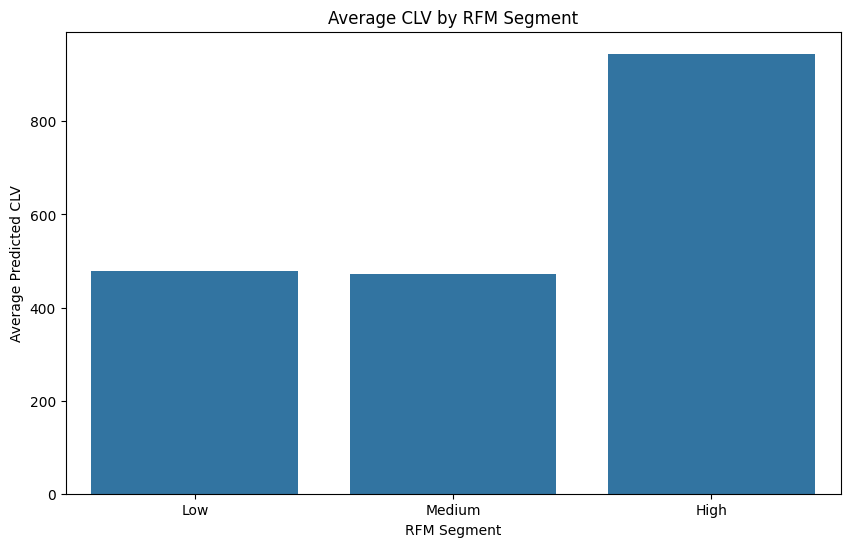

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of average CLV by RFM segment
plt.figure(figsize=(10, 6))
sns.barplot(x='rfm_segment', y='CLV', data=average_clv_by_segment)
plt.title('Average CLV by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Predicted CLV')
plt.show()


In [ ]:
# Further segment customers based on CLV
rfm_clv['CLV_Segment'] = pd.qcut(rfm_clv['CLV'], q=3, labels=['Low CLV', 'Medium CLV', 'High CLV'])

# Display the combined segments
print(rfm_clv)

      customer_id  recency_x  frequency_x  monetary_x r_score f_score m_score  \
0               1        115            1      165.56       5       3       1   
1               2        259            1      443.99       5       3       2   
2               3        591            1       68.35       4       3       1   
3               4        678            1      204.59       3       3       1   
4               5        404            1     1977.50       4       3       5   
...           ...        ...          ...         ...     ...     ...     ...   
9995         9996        332            1     1726.74       5       3       5   
9996         9997        532            1      465.80       4       3       2   
9997         9998        162            1     1176.86       5       3       3   
9998         9999        726            1      250.62       3       3       1   
9999        10000        313            1     1385.55       5       3       4   

     rfm_score rfm_segment 

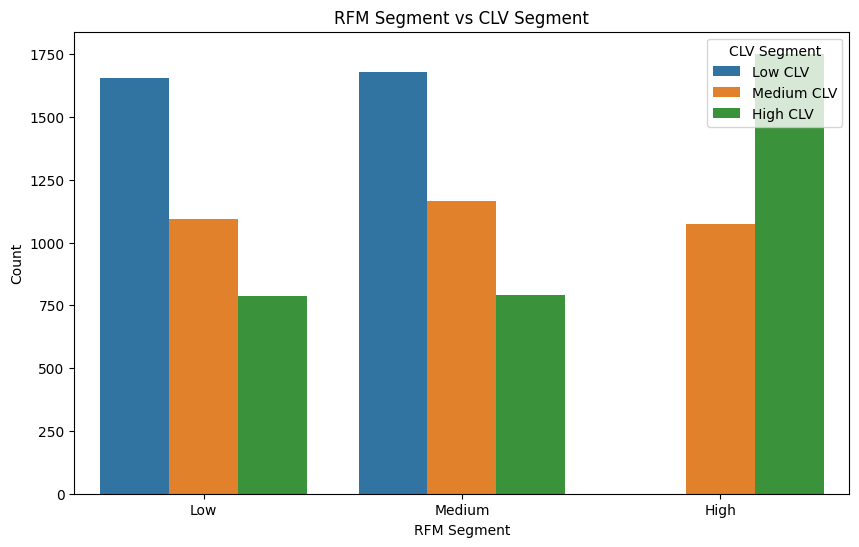

In [ ]:
# Visualize combined segments
plt.figure(figsize=(10, 6))
sns.countplot(x='rfm_segment', hue='CLV_Segment', data=rfm_clv)
plt.title('RFM Segment vs CLV Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.legend(title='CLV Segment')
plt.show()
